# Proyek Analisis Data: Bike Sharing (day.csv)
- **Nama:** Dhiyaksa Rama Sathia
- **Email:** dhiyaksarama@gmail.com
- **ID Dicoding:** dhiyaksa

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Menentukan Pertanyaan Bisnis

- Apakah musim berpengaruh terhadap jumlah penyewa sepeda?
- Bagaimana perbandingan pengguna sepeda casual dan teregistrasi berdasarkan musim?
- Bagimana perbandingan pengguna rental sepeda antara hari libur dan hari kerja?
-Bagaimana tren jumlah penyewa sepeda selama 24 bulan?

## Import Semua Packages/Library yang Digunakan

In [3]:
pip install streamlit babel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
sns.set(style='dark')

## Data Wrangling

In [5]:
#Gathering Data dengan mengimport data dari google drive dan menyimpannya dalam variabel df
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bike-sharing-dataset.zip (Unzipped Files)/day.csv')

In [6]:
#Menampilkan data dengan secara default menampilkan lima data paling atas dan lima data paling bawah
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight:**
- Data Terdiri dari 731 baris dan 16 kolom
- Arti dari setiap kolom:
-instant: index
-dteday:  tanggal
-season: musim (1:Springer, 2:Summer, 3:Fall, 4:winter)
-yr: tahun (0: 2011, 1: 2012)
-mnth: bulan (1-12)
-holiday: apakah hari libur atau bukan
-weekday: jumlah hari dalam seminggu
-workingday: (0:hari libur, 1:bukan hari libur)
-weathersit:
-1: Clear, Few clouds, Partly cloudy, Partly cloudy
-2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
-3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
-4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
-temp: suhu normal dalam celcius (setiap value dibagi 41)
-atemp: feeling temperature dalam celcius (setiap value dibagi 50)
-hum: tingkat kelembapan (setiap value dibagi 100)
-windspeed: kedepatan angin (setiap value dibagi 67)
-casual: count pengguna kasual
-registered: count pengguna yang sudah terdaftar
-cnt: count jumlah pengguna casual dan registered



### Assessing Data

In [7]:
#mencari total missing value dari setiap kolom
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
#mengecek data yang terduplikasi
df.duplicated().sum()

0

In [9]:
#memastikan semua tipe data selain dteday merupakan data numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Tidak terdapat nilai null
- Tidak terdapat Nilai yang terduplikasi
- Tipe data sudah sesuai yang berarti tidak terdapat inconcistent value atau inacurate value

### Cleaning Data

In [10]:
#mengubah tipe data dteday dari object ke datetime
df['dteday'] = pd.to_datetime(df['dteday'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Karen tidak terdapat missing value, dupilacte data, dan inacurate value maka data bisa dikatakn sudah bersih
- tipe data dteday sudah diganti dari object ke datetime untuk mempermudah proses analisis data

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
#menampilkan parameter statistic data
df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [13]:
''' Membuat pivot table dengan mengelompokan jumlah perental sepeda berdasarkan musim dan cuaca
dan menyimpannya ke dalam variable season_corr
'''
season_corr = df.groupby([df['season'], df['weathersit']]).agg({'cnt': 'sum'})
season_corr

cnt
season weathersit        
1      1           312036
       2           155573
       3             3739
2      1           626986
       2           288096
       3             3507
3      1           799443
       2           250679
       3            11007
4      1           519487
       2           302510
       3            19616

In [14]:
'''membuat tabel perbandingan jumlah perental sepeda casual dan teregistrasi berdasarkan musim
dan menyimpannya ke dalam variabel user_comparison
'''
user_comparison = df.groupby('season').agg({'casual': 'sum', 'registered': 'sum'}).reset_index()
user_comparison

,season,casual,registered
0,1,60622,410726
1,2,203522,715067
2,3,226091,835038
3,4,129782,711831


In [15]:
''' Membuat tabel perbandingan pengguna rental sepeda casual dan registered beradasarkan hari libur dan hari kerja
dan menyimpannya ke dalam variabel workingday_comparison
'''
workingday_comparison = df.groupby('workingday').agg({'casual': 'sum', 'registered': 'sum'}).reset_index()
workingday_comparison

,workingday,casual,registered
0,0,316732,683537
1,1,303285,1989125


**Insight:**
- Berdasarkan tabel season_corr, rental sepeda paling banyak dilakukan pada musim gugur dengan kondisi cuaca Clear, Few clouds, Partly cloudy, Partly cloudy. Dan rental paling sedikit terjadi di musim panas dengan kondis cuaca Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered cloud
- Berdasarkan tabel user_comparison baik pengguna casual maupun yang sudah terigstrasi keduanya paling banyak melakukan rental sepeda di musim gugur dan paling sedikit di musim semi
- Berdasarkan tabel workingday_comparison pengguna paling banyak melakukan rental sepeda pada hari kerja daripada hari libur.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah musim berpengaruh terhadap jumlah penyewa sepeda?

Text(0, 0.5, 'Jumlah Penyewa')

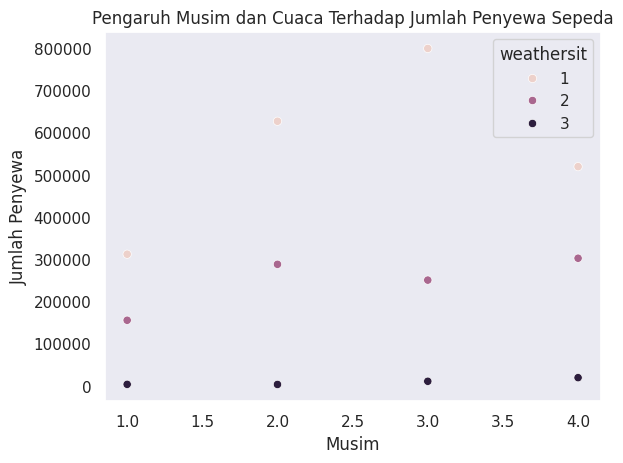

In [16]:
#Membuat Scatterplot untuk melihat pengaruh Musim dan Cuaca terhadap Jumlah Penyewa Sepeda
sns.scatterplot(x='season', y='cnt', hue='weathersit', data=season_corr)
plt.title('Pengaruh Musim dan Cuaca Terhadap Jumlah Penyewa Sepeda')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewa')

### Pertanyaan 2: Bagaimana perbandingan pengguna sepeda casual dan teregistrasi berdasarkan musim?

Text(0, 0.5, 'Jumlah Penyewa')

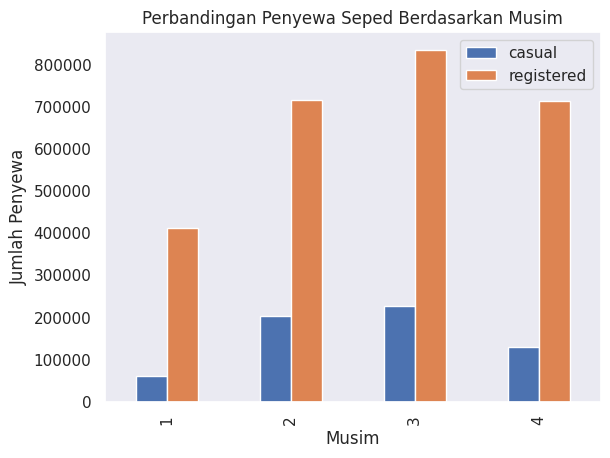

In [17]:
'''Membuat grafik perbandingan jumlah penyewa casual dan registrered berdasarkan musim
dengan 1:Springer, 2:Summer, 3:Fall, 4:winter'''

user_comparison.plot.bar(x='season')
plt.legend(['casual', 'registered'])
plt.title('Perbandingan Penyewa Seped Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewa')

Text(0, 0.5, 'Jumlah Penyewa')

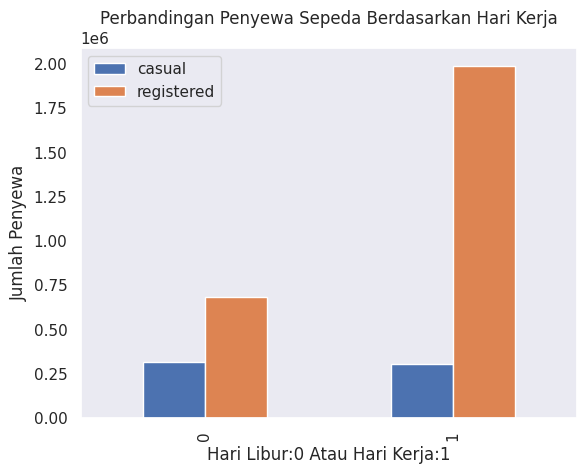

In [18]:
'''Membuat grafik perbandingan jumlah penyewa casual dan registrered berdasarkan
hari libur dan hari kerja'''

workingday_comparison.plot.bar(x='workingday')
plt.legend(['casual', 'registered'])
plt.title('Perbandingan Penyewa Sepeda Berdasarkan Hari Kerja')
plt.xlabel('Hari Libur:0 Atau Hari Kerja:1')
plt.ylabel('Jumlah Penyewa')

**Insight:**
- Pada Scattter plot untuk tabel season_corr dapat dilihat bahwa kebanyakan rental sepeda terjadi pada saat cuaca Clear, Few clouds, Partly cloudy, Partly cloudy, terutama pada saat musim gugur atau fall.
- Pada grafik bar chart user_comparison terlihat bahwa kedua jenis penyewa paling banyak menyewa sepeda pada saat musim gugur atau fall.
- Pada bar chart tabel workingday compariosn, terdapat perbedaan jumlah penyewa sepeda. Untuk pengguan casual, mereka lebih banyak merental sepeda di hari libur. Sedangkan pengguna registered paling banyak melakukan rental sepeda di hari kerja.

## Analisis Lanjutan (Opsional)

In [19]:
#menngambil bulan dari kolom dteaday
df['month'] = df['dteday'].dt.to_period('M')

#mengelompokan jumlah penyewa casual dan registered berdasarkan 24 bulan dan menyimpannya dalam variable user_trend
user_trend = df.groupby('month').agg({'casual': 'sum', 'registered': 'sum'}).reset_index()

#mengubah format yyyy-mm menjadi bulan saja dari 1-24
user_trend['month'] = range(1, len(user_trend) + 1)

#mengatur ulang kolom yang berada dalam variabel user_trend
user_trend = user_trend[['month', 'casual', 'registered']]

user_trend

,month,casual,registered
0,1,3073,35116
1,2,6242,41973
2,3,12826,51219
3,4,22346,72524
4,5,31050,104771
5,6,30612,112900
6,7,36452,104889
7,8,28842,107849
8,9,26545,100873
9,10,25222,98289


([<matplotlib.axis.XTick at 0x7d88901d2bf0>,
 [Text(1, 0, '1'),
  Text(4, 0, '4'),
  Text(7, 0, '7'),
  Text(10, 0, '10'),
  Text(13, 0, '13'),
  Text(16, 0, '16'),
  Text(19, 0, '19'),
  Text(22, 0, '22'),
  Text(25, 0, '25')])

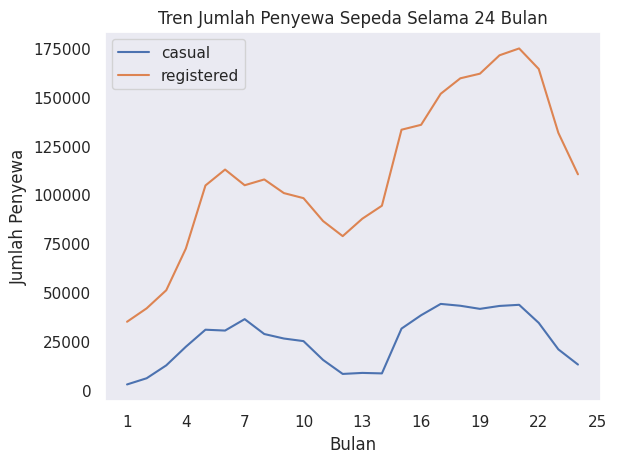

In [20]:
#Membuat line chart untuk melihat trend jumlah user selama 24 bulan
user_trend.plot(x='month')
plt.title('Tren Jumlah Penyewa Sepeda Selama 24 Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewa')
plt.xticks(range(1, 28, 3))

## Conclusion

- Conclution pertanyaan 1 : Kebanyakan rental sepeda terjadi pada saat cuaca Clear, Few clouds, Partly cloudy, Partly cloudy, terutama pada saat musim gugur atau fall.
-Conclution pertanyaan 2: Musim gugur atau fall adalah musim dimana rental sepeda paling banyak terjadi baik oleh penyewa casual maupun penyewa registered.
-Conclution pertanyaan 3: Penyewa casual paling banyak ada pada hari libur sedangkan penyewa registered paling banyak di hari kerja.
-Conclution pertanyaan 4: Tren penyewa sepeda baik casual maupun registered masih fluktuatif namun keduanya memiliki pola yang hampir sama.

# Streamlit

In [21]:
'''Menyimpan data yang sudah dibersiihkan ke dala, filr Sharing_Bike_Clean
Untuk Analasis di Streamlit
'''
df.to_csv('Sharing_Bike_Clean.csv')